## Classification of iris flower using supervised learning algorthm

In [1]:
# lib data manipulations
import numpy as np
import pandas as pd

# lib data visualizaton
import seaborn as sns
import matplotlib.pyplot as plt

# lib data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# lib supervised learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# library evaluation model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 1. Data Acquisition

In [2]:
# load dataset
dataset = pd.read_csv("../dataset/dataset_iris.csv")

In [3]:
# show metadata
print(np.round(dataset.describe(),2))

       sepal_length  sepal_width  petal_length  petal_width
count        150.00       150.00        150.00       150.00
mean           5.84         3.05          3.76         1.20
std            0.83         0.43          1.76         0.76
min            4.30         2.00          1.00         0.10
25%            5.10         2.80          1.60         0.30
50%            5.80         3.00          4.35         1.30
75%            6.40         3.30          5.10         1.80
max            7.90         4.40          6.90         2.50


In [4]:
# show dataset
print(dataset)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


### 2. Data Visualization

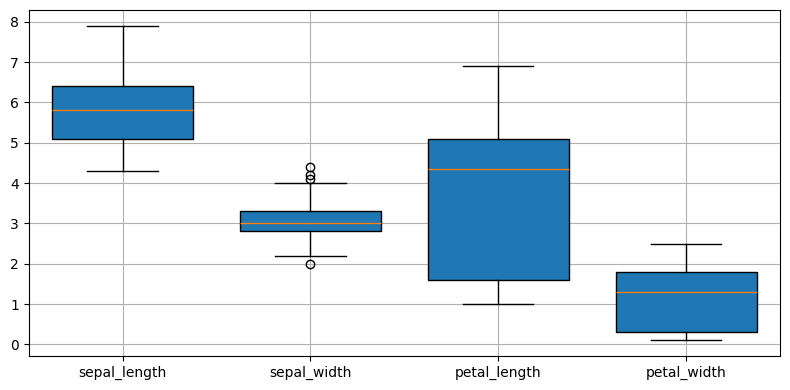

In [5]:
# define boxplot
fig, ax = plt.subplots(figsize=(8,4))
ax.boxplot(
  dataset[["sepal_length", "sepal_width", "petal_length", "petal_width"]],
  labels=["sepal_length", "sepal_width", "petal_length", "petal_width"],
  patch_artist=True, widths=(0.75, 0.75, 0.75, 0.75)
)

# set labels
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.grid(True)

# show boxplot
plt.tight_layout()
plt.show()

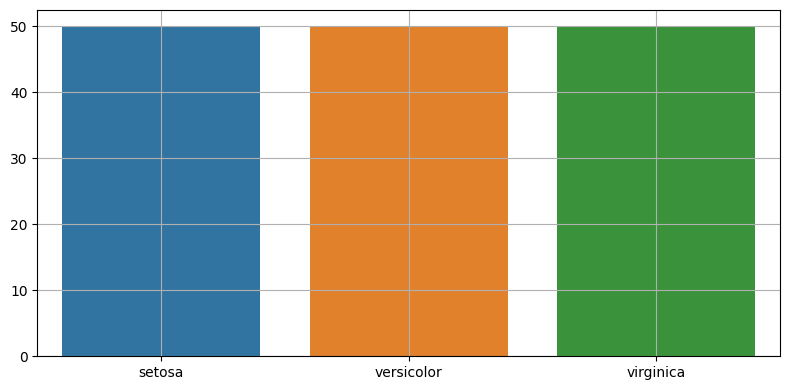

In [6]:
# create barplot
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(dataset, x="species", hue="species")
 
# set labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)
 
# show plot
plt.tight_layout()
plt.show()

In [7]:
# function scatter plot
def scatter(data, x, y):
  
  # create scatter plots
  fig, ax = plt.subplots(figsize = (8,4))
  sns.scatterplot(data=data, x=x, y=y, hue="species")

  # set labels
  ax.set_title("", fontsize=14)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.legend(loc='upper left')
  ax.grid(True)
  
  # return values
  plt.tight_layout()
  plt.show()

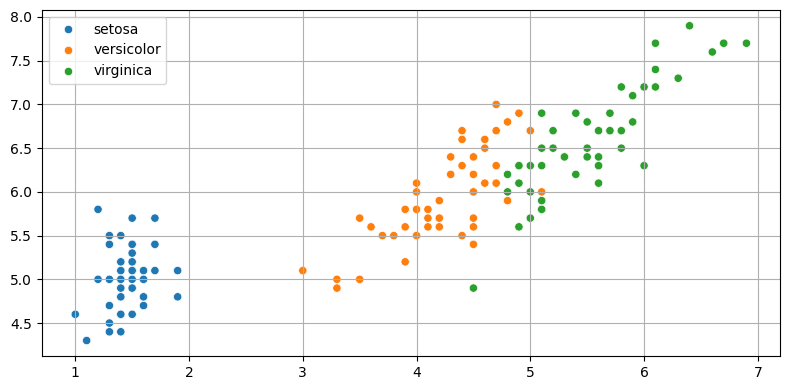

In [8]:
scatter(dataset, "petal_length", "sepal_length")

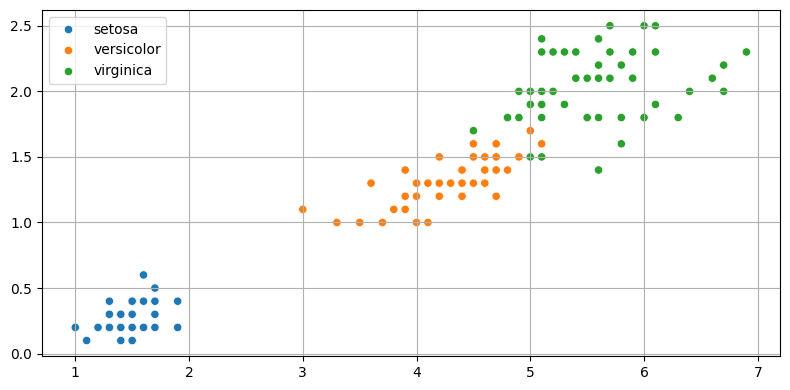

In [9]:
scatter(dataset, "petal_length", "petal_width")

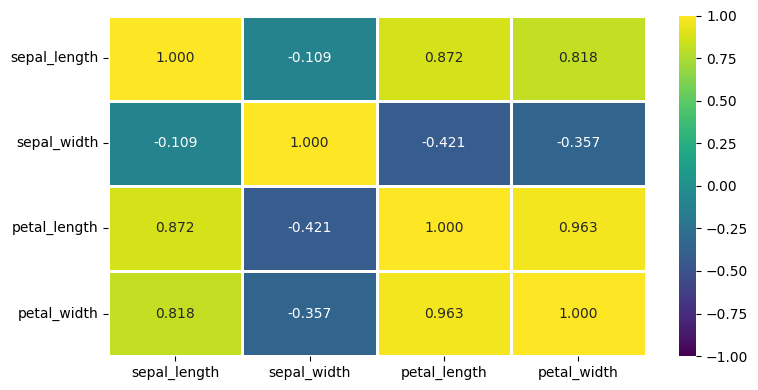

In [10]:
# create heatmap corr
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(
  dataset.corr(numeric_only=True), vmin=-1, vmax=1,
  cmap="viridis", annot=True, fmt=".3f", linewidths=1
)

# set labels
ax.set_title("", fontsize=14)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(False)

# show plot
plt.tight_layout()
plt.show()

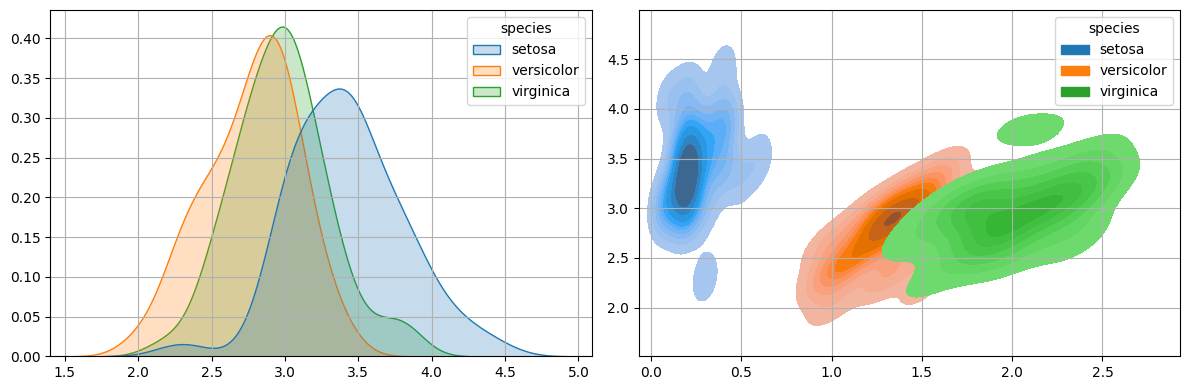

In [11]:
# create figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# create kdeplot
sns.kdeplot(data=dataset, x="sepal_width", hue="species", fill=True, ax=ax[0])
ax[0].set_title("", fontsize=14)
ax[0].set_xlabel("", fontsize=12)
ax[0].set_ylabel("", fontsize=12)
ax[0].grid(True)

# create kdeplot
sns.kdeplot(data=dataset, x="petal_width", y="sepal_width", hue="species", fill=True, ax=ax[1])
ax[1].set_title("", fontsize=14)
ax[1].set_xlabel("", fontsize=12)
ax[1].set_ylabel("", fontsize=12)
ax[1].grid(True)

# show plots
plt.tight_layout()
plt.show()

### 3. Data Preprocessing

In [12]:
# Set features and Labels
x = dataset[["sepal_length","sepal_width","petal_length","petal_width"]].values
y = dataset["species"].values

In [13]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x)

In [14]:
# split validation
trainX, testX, trainY, testY = train_test_split(
  scaled, y, train_size=0.7, test_size=0.3, random_state=7, shuffle=True
)

In [15]:
# show dimension of data train
print(trainX.shape, trainY.shape)

(105, 4) (105,)


In [16]:
# show dimension of data test
print(testX.shape, testY.shape)

(45, 4) (45,)


### 4. Modeling Supervised Learning

#### Decision Tree C45

In [17]:
# supervised learning algorithm
result_C45 = DecisionTreeClassifier(criterion="gini", random_state=None).fit(trainX, trainY).predict(testX)

In [18]:
# evaluation models - confusion_matrix
conf_C45 = confusion_matrix(testY, result_C45)
conf_C45

array([[12,  0,  0],
       [ 0, 14,  2],
       [ 0,  2, 15]], dtype=int64)

In [19]:
# evaluation models - classification_report
print(classification_report(y_true=testY, y_pred=result_C45))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88        16
   virginica       0.88      0.88      0.88        17

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



#### Naive Bayes - Gaussian

In [20]:
# supervised learning algorithm
result_gnb = GaussianNB().fit(trainX, trainY).predict(testX)

In [21]:
# evaluation models - confusion_matrix
conf_gnb = confusion_matrix(testY, result_gnb)
conf_gnb

array([[12,  0,  0],
       [ 0, 13,  3],
       [ 0,  2, 15]], dtype=int64)

In [22]:
# evaluation models - classification_report
print(classification_report(y_true=testY, y_pred=result_gnb))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.87      0.81      0.84        16
   virginica       0.83      0.88      0.86        17

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.89      0.89      0.89        45



#### K Nearest-Neighbor

In [23]:
# supervised learning algorithm
result_knn = KNeighborsClassifier(n_neighbors=3).fit(trainX, trainY).predict(testX)

In [24]:
# evaluation models - confusion_matrix
conf_knn = confusion_matrix(testY, result_knn)
conf_knn

array([[12,  0,  0],
       [ 0, 16,  0],
       [ 0,  2, 15]], dtype=int64)

In [25]:
# evaluation models - classification_report
print(classification_report(y_true=testY, y_pred=result_knn))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      1.00      0.94        16
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



#### Logistic Regression

In [26]:
# supervised learning algorithm
result_lr = LogisticRegression(max_iter=1000).fit(trainX, trainY).predict(testX)

In [27]:
# evaluation models - confusion_matrix
conf_lr = confusion_matrix(testY, result_lr)
conf_lr

array([[12,  0,  0],
       [ 0, 11,  5],
       [ 0,  2, 15]], dtype=int64)

In [28]:
# evaluation models - classification_report
print(classification_report(y_true=testY, y_pred=result_lr))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.85      0.69      0.76        16
   virginica       0.75      0.88      0.81        17

    accuracy                           0.84        45
   macro avg       0.87      0.86      0.86        45
weighted avg       0.85      0.84      0.84        45



#### Support Vector Classifier

In [29]:
# supervised learning algorithm
result_svc = SVC(kernel='rbf').fit(trainX, trainY).predict(testX)

In [30]:
# evaluation models - confusion_matrix
conf_svc = confusion_matrix(testY, result_svc)
conf_svc

array([[12,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 16]], dtype=int64)

In [31]:
# evaluation models - classification_report
print(classification_report(y_true=testY, y_pred=result_svc))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.93      0.88      0.90        16
   virginica       0.89      0.94      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

